#Download Dataset

In [1]:
#!gdown --id 1sQEIPh3bdKQ_1J3g0Z8CRqD6uU7v746l

In [2]:
#!unzip dataset.zip

In [3]:
import pathlib

data_dir = pathlib.Path("./flowers") # Lecture du dossier flower
image_count = len(list(data_dir.glob('*/*.jpg'))) #compte le nombre de fichier .jpg dans le sous dossier
print(image_count) #affiche le nombre de fichier

4317


#Load dataset

In [4]:
## Importation des librairies
import cv2
import numpy as np
import os

dataset = []
count = 0
for label in os.listdir("./flowers/"): #liste les sous-dossiers (ici des fleurs) dans le dossier flowers
    for filename in os.listdir(os.path.join("./flowers/",label)): #Liste les images dans chacun des sous-dossiers de fleurs (daisy, dandelion, etc...)
        count = count + 1 #compte le nombre de fichers
        print(str(count) + " ---loading " + filename)
        image = cv2.imread(os.path.join("./flowers/",label,filename)) #renvoie l'image chargé à partir du fichier spécifié
        dataset.append((image, label)) #ajoute la liste des images avec son label associé dans le tableau dataset

1 ---loading 100080576_f52e8ee070_n.jpg
2 ---loading 10140303196_b88d3d6cec.jpg
3 ---loading 10172379554_b296050f82_n.jpg
4 ---loading 10172567486_2748826a8b.jpg
5 ---loading 10172636503_21bededa75_n.jpg
6 ---loading 102841525_bd6628ae3c.jpg
7 ---loading 10300722094_28fa978807_n.jpg
8 ---loading 1031799732_e7f4008c03.jpg
9 ---loading 10391248763_1d16681106_n.jpg
10 ---loading 10437754174_22ec990b77_m.jpg
11 ---loading 10437770546_8bb6f7bdd3_m.jpg
12 ---loading 10437929963_bc13eebe0c.jpg
13 ---loading 10466290366_cc72e33532.jpg
14 ---loading 10466558316_a7198b87e2.jpg
15 ---loading 10555749515_13a12a026e.jpg
16 ---loading 10555815624_dc211569b0.jpg
17 ---loading 10555826524_423eb8bf71_n.jpg
18 ---loading 10559679065_50d2b16f6d.jpg
19 ---loading 105806915_a9c13e2106_n.jpg
20 ---loading 10712722853_5632165b04.jpg
21 ---loading 107592979_aaa9cdfe78_m.jpg
22 ---loading 10770585085_4742b9dac3_n.jpg
23 ---loading 10841136265_af473efc60.jpg
24 ---loading 10993710036_2033222c91.jpg
25 ---loadin

209 ---loading 2331133004_582772d58f_m.jpg
210 ---loading 2346726545_2ebce2b2a6.jpg
211 ---loading 2349640101_212c275aa7.jpg
212 ---loading 2365428551_39f83f10bf_n.jpg
213 ---loading 2408024540_37f0be7cc0_n.jpg
214 ---loading 2454280135_ac3aa75cdc_n.jpg
215 ---loading 2454280137_e1637536ae_n.jpg
216 ---loading 2473825306_62fd5f8785_n.jpg
217 ---loading 2476937534_21b285aa46_n.jpg
218 ---loading 2479956481_8d1a9699be_n.jpg
219 ---loading 2480569557_f4e1f0dcb8_n.jpg
220 ---loading 2481823240_eab0d86921.jpg
221 ---loading 2482982436_a2145359e0_n.jpg
222 ---loading 2488902131_3417698611_n.jpg
223 ---loading 2498632196_e47a472d5a.jpg
224 ---loading 2509545845_99e79cb8a2_n.jpg
225 ---loading 2511306240_9047015f2d_n.jpg
226 ---loading 2513618768_ff7c004796_m.jpg
227 ---loading 2514748602_343d4727c0_n.jpg
228 ---loading 2520369272_1dcdb5a892_m.jpg
229 ---loading 2521408074_e6f86daf21_n.jpg
230 ---loading 25360380_1a881a5648.jpg
231 ---loading 2536529152_33ef3ee078_n.jpg
232 ---loading 25385049

471 ---loading 422094774_28acc69a8b_n.jpg
472 ---loading 4222584034_8964cbd3de.jpg
473 ---loading 4229503616_9b8a42123c_n.jpg
474 ---loading 4258408909_b7cc92741c_m.jpg
475 ---loading 4268817944_cdbdb226ae.jpg
476 ---loading 4276898893_609d11db8b.jpg
477 ---loading 4278442064_a5a598524b_m.jpg
478 ---loading 4281102584_c548a69b81_m.jpg
479 ---loading 4286053334_a75541f20b_m.jpg
480 ---loading 4301689054_20519e5b68.jpg
481 ---loading 4318007511_e9f4311936_n.jpg
482 ---loading 4333085242_bbeb3e2841_m.jpg
483 ---loading 43474673_7bb4465a86.jpg
484 ---loading 435283392_72e4c5b5d6_m.jpg
485 ---loading 437859108_173fb33c98.jpg
486 ---loading 4407065098_ef25f1ccac_n.jpg
487 ---loading 4413849849_b8d2f3bcf1_n.jpg
488 ---loading 4432271543_01c56ca3a9.jpg
489 ---loading 4434592930_6610d51fca_m.jpg
490 ---loading 4440480869_632ce6aff3_n.jpg
491 ---loading 446484749_4044affcaf_n.jpg
492 ---loading 4482623536_b9fb5ae41f_n.jpg
493 ---loading 4496202781_1d8e776ff5_n.jpg
494 ---loading 450128527_fd3574

686 ---loading 7630520686_e3a61ac763.jpg
687 ---loading 7633425046_8293e3d0e9_m.jpg
688 ---loading 7669550908_bc5a11276f_n.jpg
689 ---loading 7702332000_3f21ef4571_n.jpg
690 ---loading 7749368884_1fc58c67ff_n.jpg
691 ---loading 7790614422_4557928ab9_n.jpg
692 ---loading 7924174040_444d5bbb8a.jpg
693 ---loading 799952628_bf836677fa_n.jpg
694 ---loading 8008258043_5457dd254b_n.jpg
695 ---loading 8008629838_c62bb2b016_n.jpg
696 ---loading 8021540573_c56cf9070d_n.jpg
697 ---loading 8063844363_db3f4dea85.jpg
698 ---loading 8071646795_2fdc89ab7a_n.jpg
699 ---loading 8085329197_41d53a21e2_n.jpg
700 ---loading 8094774544_35465c1c64.jpg
701 ---loading 8120563761_ed5620664f_m.jpg
702 ---loading 8127252886_96558c23d1.jpg
703 ---loading 813445367_187ecf080a_n.jpg
704 ---loading 8322526877_95d1c0f8bc_n.jpg
705 ---loading 8348621545_8f02b82662_n.jpg
706 ---loading 8382667241_0f046cecdb_n.jpg
707 ---loading 8383753520_8391dd80ee_m.jpg
708 ---loading 8405273313_bef13f6c27_n.jpg
709 ---loading 84464959

888 ---loading 145173479_7d04346c20.jpg
889 ---loading 14554897292_b3e30e52f2.jpg
890 ---loading 14576445793_582aa6446b_m.jpg
891 ---loading 146023167_f905574d97_m.jpg
892 ---loading 14614655810_9910e6dbd6_n.jpg
893 ---loading 146242691_44d9c9d6ce_n.jpg
894 ---loading 14648777167_1d92d403c9_n.jpg
895 ---loading 1469549847_eac61a6802.jpg
896 ---loading 14728922673_99086a3818_n.jpg
897 ---loading 14740350060_a489d9fa06.jpg
898 ---loading 14761980161_2d6dbaa4bb_m.jpg
899 ---loading 14805304536_c321a7b061_n.jpg
900 ---loading 148180650_19a4b410db.jpg
901 ---loading 14829055_2a2e646a8f_m.jpg
902 ---loading 14845607659_1be18c5d7f.jpg
903 ---loading 148698493_5710e5f472.jpg
904 ---loading 14884028290_a1344eb446.jpg
905 ---loading 14886860069_b84665a073.jpg
906 ---loading 14886963928_d4856f1eb6_n.jpg
907 ---loading 14914603395_b271ffab56_n.jpg
908 ---loading 149782934_21adaf4a21.jpg
909 ---loading 15002906952_cab2cb29cf.jpg
910 ---loading 15005530987_e13b328047_n.jpg
911 ---loading 15123503538

1097 ---loading 23891393761_155af6402c.jpg
1098 ---loading 2389720627_8923180b19.jpg
1099 ---loading 2392273474_a64cef0eaf_n.jpg
1100 ---loading 2395009660_295c8ffd67_m.jpg
1101 ---loading 2401343175_d2a892cf25_n.jpg
1102 ---loading 2443192475_c64c66d9c2.jpg
1103 ---loading 2444241718_3ca53ce921.jpg
1104 ---loading 2449852402_45d12b9875_n.jpg
1105 ---loading 2453532367_fc373df4de.jpg
1106 ---loading 2457473644_5242844e52_m.jpg
1107 ---loading 2462379970_6bd5560f4c_m.jpg
1108 ---loading 2462476884_58c617b26a.jpg
1109 ---loading 2465442759_d4532a57a3.jpg
1110 ---loading 2465573725_d78caca9d4_n.jpg
1111 ---loading 2467980325_237b14c737_m.jpg
1112 ---loading 2469856983_fe8e36ba57.jpg
1113 ---loading 2470731130_089b8514f6_n.jpg
1114 ---loading 2470874500_43d8011e75.jpg
1115 ---loading 2472641499_cbe617a93d.jpg
1116 ---loading 2473862606_291ae74885.jpg
1117 ---loading 2476098674_e6f39536f5_n.jpg
1118 ---loading 2477231067_3aecef1bf8_n.jpg
1119 ---loading 2477986396_19da36d557_m.jpg
1120 ---l

1367 ---loading 3502447188_ab4a5055ac_m.jpg
1368 ---loading 3505026222_c760df0035_n.jpg
1369 ---loading 3509307596_6cfe97867d_n.jpg
1370 ---loading 3512879565_88dd8fc269_n.jpg
1371 ---loading 3513200808_390f1d63a7_m.jpg
1372 ---loading 3517492544_0fd3ed6a66_m.jpg
1373 ---loading 3518608454_c3fd3c311c_m.jpg
1374 ---loading 3530495617_fd84fb321a_m.jpg
1375 ---loading 3530500952_9f94fb8b9c_m.jpg
1376 ---loading 3533075436_0954145b9f_m.jpg
1377 ---loading 3533167406_e9f4cf10bb_m.jpg
1378 ---loading 3539077354_c67aa7168d_m.jpg
1379 ---loading 3554435478_1a7ab743e9_n.jpg
1380 ---loading 3554992110_81d8c9b0bd_m.jpg
1381 ---loading 3562861685_8b8d747b4d.jpg
1382 ---loading 3580437733_9ef51f2981_n.jpg
1383 ---loading 3580443099_9a6902ebd8_n.jpg
1384 ---loading 3581252194_8c976d333a_n.jpg
1385 ---loading 3584414925_1e6c4b61db_n.jpg
1386 ---loading 3584415133_a4122ab7b9.jpg
1387 ---loading 3585220976_5acac92d1c.jpg
1388 ---loading 3589816063_50f8de7b64_m.jpg
1389 ---loading 3591588855_b4fd53b000.

1570 ---loading 570127230_ce409f90f8_n.jpg
1571 ---loading 5715788902_9dd2b4ef1d.jpg
1572 ---loading 5716633491_55e6f02645_n.jpg
1573 ---loading 5725836812_a7d1c5540d_m.jpg
1574 ---loading 5726984343_ae124aed97.jpg
1575 ---loading 5727534342_419604c177_n.jpg
1576 ---loading 5733004219_a0ba411bfa_n.jpg
1577 ---loading 5740633858_8fd54c23c9_n.jpg
1578 ---loading 5744236092_de84b4e38d_n.jpg
1579 ---loading 5745882709_fb6fc8f02a_n.jpg
1580 ---loading 5749815755_12f9214649_n.jpg
1581 ---loading 5757012454_c37f305b73.jpg
1582 ---loading 5760890854_c3e009bc8a_n.jpg
1583 ---loading 5762590366_5cf7a32b87_n.jpg
1584 ---loading 5767676943_4f9c7323f3_n.jpg
1585 ---loading 5768217474_f6b1eef6d5_n.jpg
1586 ---loading 5772194932_60b833091f.jpg
1587 ---loading 5776879272_95008399c3.jpg
1588 ---loading 578938011_34918b1468.jpg
1589 ---loading 5797606814_ccac615312_m.jpg
1590 ---loading 5829610661_8439ba4a77_n.jpg
1591 ---loading 5862288632_1df5eb6dd0.jpg
1592 ---loading 5863928177_8ae1425e76_n.jpg
1593

1789 ---loading 9010116368_2f51f1e086_n.jpg
1790 ---loading 9011235009_58c7b244c1_n.jpg
1791 ---loading 9029297232_de50698e2f_n.jpg
1792 ---loading 9029756865_db8891807a_n.jpg
1793 ---loading 9111669902_9471c3a49c_n.jpg
1794 ---loading 9152356642_06ae73113f.jpg
1795 ---loading 9188647508_3b56e62f69.jpg
1796 ---loading 9200211647_be34ce978b.jpg
1797 ---loading 921252114_91e334b950.jpg
1798 ---loading 9262004825_710346cde9_n.jpg
1799 ---loading 9293460423_7fbb1e3c32_n.jpg
1800 ---loading 9300335851_cdf1cef7a9.jpg
1801 ---loading 9301891790_971dcfb35d_m.jpg
1802 ---loading 9472854850_fc9e1db673.jpg
1803 ---loading 9517326597_5d116a0166.jpg
1804 ---loading 9533964635_f38e6fa3c3.jpg
1805 ---loading 9595369280_dd88b61814.jpg
1806 ---loading 9613826015_f345354874.jpg
1807 ---loading 9617087594_ec2a9b16f6.jpg
1808 ---loading 9646730031_f3d5014416_n.jpg
1809 ---loading 9719816995_8f211abf02_n.jpg
1810 ---loading 9726260379_4e8ee66875_m.jpg
1811 ---loading 9759608055_9ab623d193.jpg
1812 ---loadi

1988 ---loading 17449165090_dfb27af360_n.jpg
1989 ---loading 17554868955_35f48516cd_m.jpg
1990 ---loading 1756973583_4aac7df00d_m.jpg
1991 ---loading 1757822526_fe30b9b3ca_m.jpg
1992 ---loading 1775233884_12ff5a124f.jpg
1993 ---loading 17867791274_25bb3f8a41_n.jpg
1994 ---loading 17869810353_c0d9902bc3_n.jpg
1995 ---loading 17869839663_1445f1efd0_n.jpg
1996 ---loading 17869846573_d6c9c39843_n.jpg
1997 ---loading 1788484468_f73afa6c32_n.jpg
1998 ---loading 1793211631_68c31a74dc.jpg
1999 ---loading 17953368844_be3d18cf30_m.jpg
2000 ---loading 17990320484_93bba345d2_m.jpg
2001 ---loading 1801614110_bb9fa46830.jpg
2002 ---loading 180613732_3a7aba0b80_n.jpg
2003 ---loading 1813435848_7852708394_n.jpg
2004 ---loading 18220342690_f1c20134bd.jpg
2005 ---loading 18302672248_38fe0f70af_n.jpg
2006 ---loading 18302691898_9dc45afae8_n.jpg
2007 ---loading 18302701228_2b5790b199_n.jpg
2008 ---loading 18302780950_9469703544_n.jpg
2009 ---loading 18302793940_8fcc8b4661_n.jpg
2010 ---loading 18302796110

2202 ---loading 4504731519_9a260b6607_n.jpg
2203 ---loading 4505921907_21c8002fde.jpg
2204 ---loading 4553266758_09d4dbdac9_n.jpg
2205 ---loading 4558025386_2c47314528.jpg
2206 ---loading 4575042086_7674b76297_n.jpg
2207 ---loading 4588034197_e300b0872a_n.jpg
2208 ---loading 459042023_6273adc312_n.jpg
2209 ---loading 4608559939_3487bf3b62_n.jpg
2210 ---loading 4609166128_b7ed49b40b_m.jpg
2211 ---loading 4609168052_3d4e1d3804_n.jpg
2212 ---loading 4612766755_7d3f047db0_n.jpg
2213 ---loading 4612774939_e26ec1c34d_n.jpg
2214 ---loading 4612784323_0bcfb978f0_n.jpg
2215 ---loading 4612826243_7d86870a1b_n.jpg
2216 ---loading 4612830331_2a44957465_n.jpg
2217 ---loading 4612833069_8e48b47aa4_n.jpg
2218 ---loading 4625089819_55c45a189c.jpg
2219 ---loading 4644336779_acd973528c.jpg
2220 ---loading 4648680921_80dfc4f12a.jpg
2221 ---loading 4654893119_45d232016b.jpg
2222 ---loading 466486216_ab13b55763.jpg
2223 ---loading 4675532860_890504a4a3_m.jpg
2224 ---loading 4684127262_6c3346188d.jpg
2225 -

2460 ---loading 7187035716_5d0fb95c31_n.jpg
2461 ---loading 7211616670_2d49ecb3a5_m.jpg
2462 ---loading 7251352826_69b62cba2c_m.jpg
2463 ---loading 7285188160_49d84b95a3_m.jpg
2464 ---loading 7302931078_30054c1970_n.jpg
2465 ---loading 7304710956_015b41f802_m.jpg
2466 ---loading 7316409504_7cf3707f8a_m.jpg
2467 ---loading 7345657862_689366e79a.jpg
2468 ---loading 7376471712_e1be793f94.jpg
2469 ---loading 7376473742_532364cee5_n.jpg
2470 ---loading 7409458444_0bfc9a0682_n.jpg
2471 ---loading 7419966772_d6c1c22a81.jpg
2472 ---loading 7420699022_60fa574524_m.jpg
2473 ---loading 7455236056_b6d71a8dab.jpg
2474 ---loading 7456196174_f9de97ba73_n.jpg
2475 ---loading 7456196534_f69c17efa3_n.jpg
2476 ---loading 7456196908_d34b9b76c4_n.jpg
2477 ---loading 7456197696_7e1558cc22_n.jpg
2478 ---loading 7456198272_f5d0c6bc7e_n.jpg
2479 ---loading 7456439188_c2ba954a5d_n.jpg
2480 ---loading 7456439862_8b1ae909b7_n.jpg
2481 ---loading 7456492140_478b48ef8e_n.jpg
2482 ---loading 7456611336_52fec6b57e_n.

2680 ---loading 14928117202_139d2142cc_n.jpg
2681 ---loading 14932787983_d6e05f2434_m.jpg
2682 ---loading 14955545254_324cd4ee75.jpg
2683 ---loading 14969295739_c132a08663_n.jpg
2684 ---loading 15026703621_e15e9d55f0_n.jpg
2685 ---loading 15030133005_9728102622_z.jpg
2686 ---loading 15042911059_b6153d94e7_n.jpg
2687 ---loading 15043962658_dcf9dff5e9_n.jpg
2688 ---loading 15054750690_198b6ab0f2_n.jpg
2689 ---loading 15054751430_5af76f6096_n.jpg
2690 ---loading 15054752730_fcf54d475e_m.jpg
2691 ---loading 15054753070_4f6ae0e763_m.jpg
2692 ---loading 15054864058_2edca122a9_n.jpg
2693 ---loading 15054864508_0334b892be_m.jpg
2694 ---loading 15054865217_e398d0dc9f_n.jpg
2695 ---loading 15054865768_2cc87ac9d4_m.jpg
2696 ---loading 15054866658_c1a6223403_m.jpg
2697 ---loading 15054866898_60ee50ec6b_n.jpg
2698 ---loading 15066430311_fb57fa92b0_m.jpg
2699 ---loading 15069459615_7e0fd61914_n.jpg
2700 ---loading 15072973261_73e2912ef2_n.jpg
2701 ---loading 15081164641_45a7b92b3a_m.jpg
2702 ---load

2875 ---loading 2694860538_b95d60122c_m.jpg
2876 ---loading 2697194548_ec8f8de97c_n.jpg
2877 ---loading 2706304885_4916102704_n.jpg
2878 ---loading 2706736074_b0fba20b3e.jpg
2879 ---loading 2720698862_486d3ec079_m.jpg
2880 ---loading 2721638730_34a9b7a78b.jpg
2881 ---loading 2723995667_31f32294b4.jpg
2882 ---loading 2729206569_9dd2b5a3ed.jpg
2883 ---loading 2733109082_1351f6738a_n.jpg
2884 ---loading 27465811_9477c9d044.jpg
2885 ---loading 27466794_57e4fe5656.jpg
2886 ---loading 274846229_990e976683_n.jpg
2887 ---loading 274848710_5185cf33b1_n.jpg
2888 ---loading 2759796022_55bd47bfa2_n.jpg
2889 ---loading 2767658405_1e2043f44c_n.jpg
2890 ---loading 2767688889_b176b0c3fb.jpg
2891 ---loading 2803725948_5fd1f2fc99_n.jpg
2892 ---loading 2807106374_f422b5f00c.jpg
2893 ---loading 2816256710_a2d3616fae.jpg
2894 ---loading 2816503473_580306e772.jpg
2895 ---loading 2823659190_afdabee45c.jpg
2896 ---loading 28661674053_44f8034570_n.jpg
2897 ---loading 28664252816_1f24388ee6_n.jpg
2898 ---loadin

3084 ---loading 5043409856_395300dbe5_m.jpg
3085 ---loading 5067864967_19928ca94c_m.jpg
3086 ---loading 5076821914_c21b58fd4c_m.jpg
3087 ---loading 5091281256_648c37d7c1_n.jpg
3088 ---loading 50987813_7484bfbcdf.jpg
3089 ---loading 5115925320_ed9ca5b2d1_n.jpg
3090 ---loading 5139969631_743880e01d_n.jpg
3091 ---loading 5139969871_c9046bdaa7_n.jpg
3092 ---loading 5139971615_434ff8ed8b_n.jpg
3093 ---loading 5139977283_530c508603_n.jpg
3094 ---loading 5139977423_d413b23fde_m.jpg
3095 ---loading 5139977579_ea2dd6a322_m.jpg
3096 ---loading 5180260869_1db7ff98e4_n.jpg
3097 ---loading 5180859236_60aa57ff9b_n.jpg
3098 ---loading 5180861654_0741222c62_n.jpg
3099 ---loading 5223643767_d8beb7e410.jpg
3100 ---loading 5231868667_f0baa71feb_n.jpg
3101 ---loading 5293283002_9b17f085f7_m.jpg
3102 ---loading 5330608174_b49f7a4c48_m.jpg
3103 ---loading 5339004958_a0a6f385fd_m.jpg
3104 ---loading 5357144886_b78f4782eb.jpg
3105 ---loading 5437996076_cf7e2ac32e_n.jpg
3106 ---loading 5492906452_80943bfd04.jp

3327 ---loading 9681915384_b3b646dc92_m.jpg
3328 ---loading 969913643_9d5cd2fe45_m.jpg
3329 ---loading 9699724719_a8439cc0fd_n.jpg
3330 ---loading 9738792160_00cbcc99c8_n.jpg
3331 ---loading 9783416751_b2a03920f7_n.jpg
3332 ---loading 9825716455_f12bcc8d4e_n.jpg
3333 ---loading 9904127656_f76a5a4811_m.jpg
3334 ---loading 100930342_92e8746431_n.jpg
3335 ---loading 10094729603_eeca3f2cb6.jpg
3336 ---loading 10094731133_94a942463c.jpg
3337 ---loading 10128546863_8de70c610d.jpg
3338 ---loading 10163955604_ae0b830975_n.jpg
3339 ---loading 10164073235_f29931d91e.jpg
3340 ---loading 10686568196_b1915544a8.jpg
3341 ---loading 107693873_86021ac4ea_n.jpg
3342 ---loading 10791227_7168491604.jpg
3343 ---loading 10995953955_089572caf0.jpg
3344 ---loading 110147301_ad921e2828.jpg
3345 ---loading 112334842_3ecf7585dd.jpg
3346 ---loading 112428665_d8f3632f36_n.jpg
3347 ---loading 112428919_f0c5ad7d9d_n.jpg
3348 ---loading 112650879_82adc2cc04_n.jpg
3349 ---loading 112651128_7b5d39a346_m.jpg
3350 ---lo

3518 ---loading 14088017343_dd158d2eb5.jpg
3519 ---loading 14090534565_5857ce4b7c_n.jpg
3520 ---loading 14090546015_504c8becd1.jpg
3521 ---loading 14093565032_a8f1e349d1.jpg
3522 ---loading 14093884601_c87b5cd663_n.jpg
3523 ---loading 14093907931_dd8f642574.jpg
3524 ---loading 14094114202_4c1d7f1116.jpg
3525 ---loading 14094146241_0b9fa7b3e0.jpg
3526 ---loading 14097111174_87a2e7e0c7_n.jpg
3527 ---loading 14097328354_4f1469a170.jpg
3528 ---loading 14097366955_84ef6369f2.jpg
3529 ---loading 14097676864_4ca8e8b20d_n.jpg
3530 ---loading 14097745904_436c4ba1b4_n.jpg
3531 ---loading 14099204939_60e6ffa4c3_n.jpg
3532 ---loading 14103897845_7986002615.jpg
3533 ---loading 14110615113_bd7b3fcb84.jpg
3534 ---loading 14110616533_e04775e7b1.jpg
3535 ---loading 14116780333_7836f4448c.jpg
3536 ---loading 14116826873_d4bab623bf_n.jpg
3537 ---loading 14122029097_3e3285ca5c_n.jpg
3538 ---loading 14124669683_7fb74f20c3.jpg
3539 ---loading 14127532150_112823a8f6.jpg
3540 ---loading 14149603605_eedfe9678c

3749 ---loading 19884050362_347e5342f2_n.jpg
3750 ---loading 19892310888_9bbdec4ea7_n.jpg
3751 ---loading 19892369060_d1298a9816_n.jpg
3752 ---loading 19903091702_3522e9ef3c_n.jpg
3753 ---loading 19912513252_93d8df17cf_n.jpg
3754 ---loading 19914611213_150f7125a9_n.jpg
3755 ---loading 19915714271_3d8d6a23a5_n.jpg
3756 ---loading 19922971178_a71078f2ed_n.jpg
3757 ---loading 19938037625_f26c4dae34_n.jpg
3758 ---loading 19950169968_a29db804b5_n.jpg
3759 ---loading 20093632966_0d53e13036_n.jpg
3760 ---loading 20093649146_5a93a8f173_n.jpg
3761 ---loading 20096276219_7d16867bcc_n.jpg
3762 ---loading 20111973586_2987a89bed_n.jpg
3763 ---loading 20116517681_2f10db9e82_n.jpg
3764 ---loading 20133942640_0f4442b858_n.jpg
3765 ---loading 20138534672_af5fd5eb32_n.jpg
3766 ---loading 20152653918_009a39f323_n.jpg
3767 ---loading 20246050943_3620c7373f_n.jpg
3768 ---loading 20265958876_edb70c4553_n.jpg
3769 ---loading 20282921225_6033da8cd5_n.jpg
3770 ---loading 20283873362_fece39a33e_n.jpg
3771 ---lo

3975 ---loading 4590703575_6371c0a186_n.jpg
3976 ---loading 4591323356_030d8b6967_m.jpg
3977 ---loading 4599815420_8ee42c2382.jpg
3978 ---loading 4602809199_d3030cef01_m.jpg
3979 ---loading 4604238410_bcec9da4a0_n.jpg
3980 ---loading 4604272150_0c92385530_n.jpg
3981 ---loading 4612075317_91eefff68c_n.jpg
3982 ---loading 4624404489_11e10fcd33_n.jpg
3983 ---loading 4644110077_ff252cd7c4.jpg
3984 ---loading 466409031_4c10294db5_m.jpg
3985 ---loading 467702445_b8676f60fb_n.jpg
3986 ---loading 4679869990_7c5f28f2fe_n.jpg
3987 ---loading 4681062529_36186617d9.jpg
3988 ---loading 471298577_cc7558bcf1.jpg
3989 ---loading 478765271_6a8ca1cfa1_m.jpg
3990 ---loading 480228053_513791d474.jpg
3991 ---loading 4838669164_ffb6f67139.jpg
3992 ---loading 483880052_19fdb26a9f.jpg
3993 ---loading 485266837_671def8627.jpg
3994 ---loading 485415743_eeb5d7c1a5.jpg
3995 ---loading 4890786831_91bb82a9e4_n.jpg
3996 ---loading 489506904_9b68ba211c.jpg
3997 ---loading 490541142_c37e2b4191_n.jpg
3998 ---loading 49

4174 ---loading 7166635566_ee240b5408_n.jpg
4175 ---loading 7166640338_46b15d9ec8_n.jpg
4176 ---loading 7166644048_b00a14f01b.jpg
4177 ---loading 7166644048_b00a14f01b_n.jpg
4178 ---loading 7166646966_41d83cd703.jpg
4179 ---loading 7177682195_c29265748d_n.jpg
4180 ---loading 7179796338_05e8b1c87b.jpg
4181 ---loading 7205145492_baec4dbb94.jpg
4182 ---loading 7205698252_b972087cc2.jpg
4183 ---loading 7247182064_f8d6759446_n.jpg
4184 ---loading 7266196114_c2a736a15a_m.jpg
4185 ---loading 7342871880_c17fe0eb4f_m.jpg
4186 ---loading 738207467_fc59cfcd9b_z.jpg
4187 ---loading 7447655334_e8f805ab95_m.jpg
4188 ---loading 7448453762_aea8739f1b.jpg
4189 ---loading 7481204112_e3c57dd40a_n.jpg
4190 ---loading 7481215720_73e40f178f_n.jpg
4191 ---loading 7481217920_6f65766a1c_n.jpg
4192 ---loading 7775145448_c42e638a6a_n.jpg
4193 ---loading 779359602_30abcbf5bb_n.jpg
4194 ---loading 7806320016_fcddfc1f8f_n.jpg
4195 ---loading 8394186551_28eed83a94_m.jpg
4196 ---loading 8454707381_453b4862eb_m.jpg
41

In [5]:
import random #importe la librairie random
print(random.sample(dataset, 10)) #Sélectionne 10 éléments alétoirement dans le tableau dataset

[(array([[[  2,   8,   7],
        [  2,   8,   7],
        [  2,   7,   8],
        ...,
        [  0,   4,   5],
        [  0,   4,   5],
        [  0,   5,   6]],

       [[  1,   7,   6],
        [  1,   7,   6],
        [  1,   6,   7],
        ...,
        [  0,   4,   5],
        [  0,   4,   5],
        [  0,   5,   6]],

       [[  1,   6,   7],
        [  1,   6,   7],
        [  1,   6,   7],
        ...,
        [  0,   4,   5],
        [  0,   4,   5],
        [  0,   5,   6]],

       ...,

       [[  3, 146, 197],
        [  2, 151, 201],
        [  0, 158, 206],
        ...,
        [  3,  51,  63],
        [  0,  48,  60],
        [  1,  46,  59]],

       [[  2, 145, 196],
        [  0, 147, 197],
        [  0, 152, 201],
        ...,
        [  0,  39,  48],
        [  0,  35,  45],
        [  0,  35,  45]],

       [[  0, 144, 192],
        [  0, 145, 193],
        [  0, 147, 194],
        ...,
        [  0,  33,  42],
        [  0,  31,  37],
        [  1,  30,  37

In [6]:
# import random
random.shuffle(dataset) #Mélange le dataset

#Display dataset

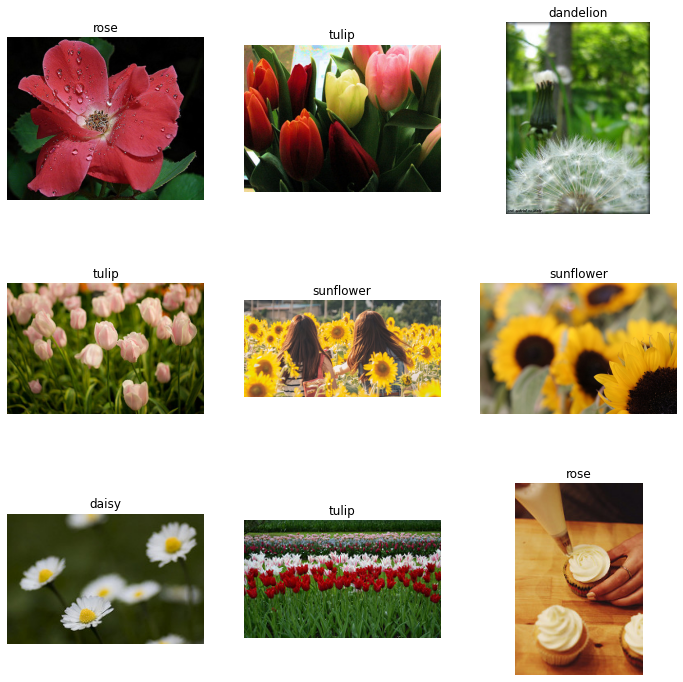

In [7]:
import matplotlib.pyplot as plt

# utilise la librairie matplotlib pour afficher sur une figure de dimension 3x3 les 9 images
fig, axs = plt.subplots(3, 3, figsize = (12, 12)) 
plt.gray() #définit la palette de couleur à gray

for i, ax in enumerate(axs.flat):
    ax.imshow(dataset[i][0][:,:,::-1]) #affiche l'image
    ax.axis('off') #pas d'axe 
    ax.set_title(dataset[i][1]) #affiche le label de l'image
plt.show()

#Preprocessing

##Resizing

In [8]:
image_size = (32, 32) #définit la taille de l'image à 32x32

In [9]:
import cv2
resized = []
for d in dataset:
    resized.append((cv2.resize(d[0], image_size), d[1])) #pour chaque image du dataset, on redimensionne à la taille 32x32, 
                                                         #et on le store dans la variable temporaire resized

In [10]:
dataset = resized #les images du dataset ont été redimensionné à la taille 32x32

##Reshape

In [11]:
images = np.asarray([d[0] for d in dataset]) #convertis les éléments en tableaux numpy
print(images.shape)  #liste de toutes les images (4317 au total) de dimensions 32x32 sur 3 canaux (3 couleurs/RGB) 
                     #shapes : structure et retourne le format des tableaux

(4317, 32, 32, 3)


In [12]:
images =  np.reshape(images, 
                     (images.shape[0], images.shape[1]*images.shape[2]*images.shape[3]))
#aplati les données des images : on va réduire les dimensions de notre dataset en un tableau 2D
print(images.shape)

(4317, 3072)


In [13]:
# On va attribuer à chacun des labels un numéro de 0 à 4
labels_classes_mapping = {"daisy":0,"dandelion":1,"rose":2,"sunflower":3,"tulip":4}
labels = np.asarray([labels_classes_mapping[d[1]] for d in dataset]) #on obtient la liste des labels de chacun de nos images 
print(labels.shape) #la dimension de notre liste de label est bien égale au nombres d'images que l'on dispose

(4317,)


##Normalization

In [14]:
#Exemple d'un vecteur d'image non normalisé
print(images[0])

[ 1  1  1 ... 24 75 22]


In [15]:
images = np.divide(images, 255) #Division par 255 pour normaliser les couleurs RGB entre 0 et 1

In [16]:
#Exemple d'un vecteur d'image après normalisation par 255
print(images[0])

[0.00392157 0.00392157 0.00392157 ... 0.09411765 0.29411765 0.08627451]


#Split Train/Test

In [17]:
from sklearn.model_selection import train_test_split #importe la fonction train_test_split de sklearn
(train_x, test_x, train_y, test_y) = train_test_split(images,labels) # on va séparer notre jeu de données en deux sets (training set/testing set)

#SVM

In [18]:
from sklearn.svm import SVC #importe la fonction SVC de sklearn.svm pour réaliser un Support Vector Classification

svc = SVC(kernel='linear') # SVC de type linéaire
svc.fit(train_x, train_y) # entraînement de notre modèle SVM à partir de notre training set 

SVC(kernel='linear')

In [19]:
predicted_y = svc.predict(test_x) # prédiction à partir de notre modèle entraîné sur le jeu de test
predicted_y_train = svc.predict(train_x) # prédiction à partir de notre modèle entraîné sur le jeu de training (pour vérifier)

In [20]:
from sklearn.metrics import accuracy_score 
print("Accuracy on training data is",accuracy_score(train_y, predicted_y_train,)) #affichage du score de précision obtenu sur le jeu de training qui est de 99%
print("Accuracy on unknown data is",accuracy_score(test_y,predicted_y)) #affichage du score de précision obtenu sur le jeu de test "inconnu" qui est de 38%
#Conclusion : le modèle ne prédit pas assez bien (38% seulement) sur un jeu de données inconnu

Accuracy on training data is 0.9987642879209144
Accuracy on unknown data is 0.3907407407407407
